In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
data_set=pd.read_csv('hotel_bookings.csv')

In [6]:
data_set.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<Axes: >

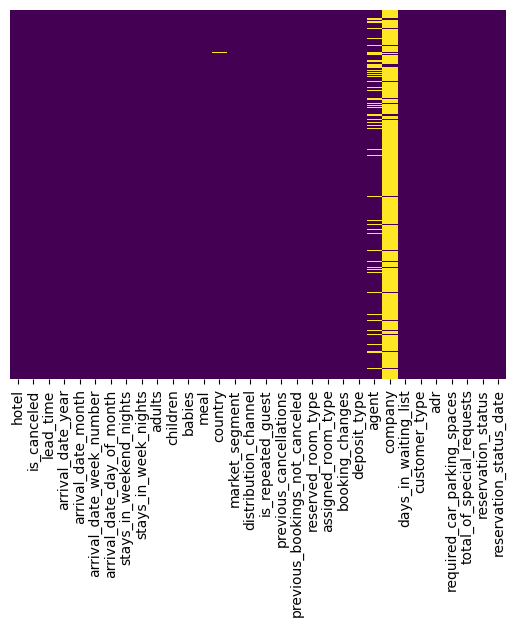

In [8]:
sns.heatmap(data_set.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
data_set.drop(['company','agent'],axis=1,inplace=True)

In [10]:
data_set.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
data_set.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [12]:
data_set.dropna(inplace=True)



In [13]:
data_set['meal'].value_counts()

meal
BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: count, dtype: int64

In [14]:
data_set['arrival_date_month']= data_set['arrival_date_month'].map(dict(July=7,August=8,September=9,October=10,November=11,December=12,January=1,February=2,March=3,April=4,May=5,June=6))

In [15]:
data_set.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


C:\Users\OWNER\AppData\Local\Temp\ipykernel_7972\2154033233.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_canceled', y='market_segment', data=country_cancellation_rate, palette='viridis')


<Axes: xlabel='is_canceled', ylabel='market_segment'>

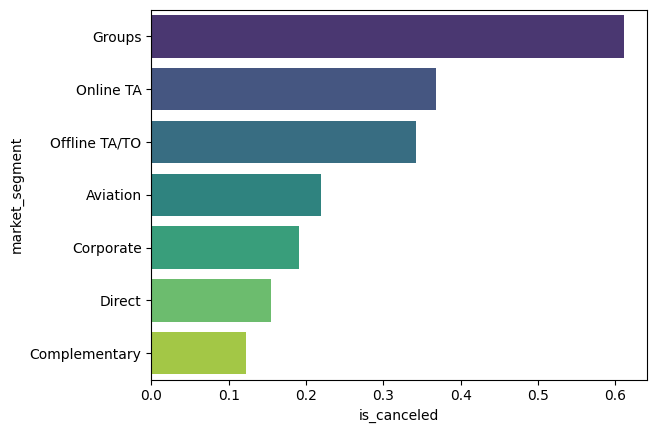

In [16]:
top_countries = data_set['market_segment'].value_counts().head(15).index
# Filter the dataframe to include only the top countries
df_top_countries = data_set[data_set['market_segment'].isin(top_countries)]

# Group by country and calculate the mean cancellation rate
country_cancellation_rate = df_top_countries.groupby('market_segment')['is_canceled'].mean().reset_index()

# Sort the values for better visualization
country_cancellation_rate = country_cancellation_rate.sort_values(by='is_canceled', ascending=False)

sns.barplot(x='is_canceled', y='market_segment', data=country_cancellation_rate, palette='viridis')


In [17]:
data_set['country_encoded'] = data_set['country'].map(data_set['country'].value_counts(normalize=True))


In [18]:
data_set['country_encoded']

0         0.408636
1         0.408636
2         0.102012
3         0.102012
4         0.102012
            ...   
119385    0.019698
119386    0.087596
119387    0.061288
119388    0.102012
119389    0.061288
Name: country_encoded, Length: 118898, dtype: float64

In [19]:
hotel_data=pd.get_dummies(data_set['hotel'],drop_first=True)
data_set['hotel']= hotel_data

In [20]:
data_cus=pd.get_dummies(data_set['customer_type'],drop_first=True)
data_dep=pd.get_dummies(data_set['deposit_type'],drop_first=True)
data_set=pd.concat([data_set,data_cus,data_dep],axis=1)

In [21]:
data_set.drop(['customer_type','deposit_type'],axis=1,inplace=True)

In [22]:
data_set.drop(['reservation_status_date','reservation_status'],axis=1,inplace=True)

In [23]:
data_set.drop([])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,country_encoded,Group,Transient,Transient-Party,Non Refund,Refundable
0,True,0,342,2015,7,27,1,0,0,2,...,0,0.00,0,0,0.408636,False,True,False,False,False
1,True,0,737,2015,7,27,1,0,0,2,...,0,0.00,0,0,0.408636,False,True,False,False,False
2,True,0,7,2015,7,27,1,0,1,1,...,0,75.00,0,0,0.102012,False,True,False,False,False
3,True,0,13,2015,7,27,1,0,1,1,...,0,75.00,0,0,0.102012,False,True,False,False,False
4,True,0,14,2015,7,27,1,0,2,2,...,0,98.00,0,1,0.102012,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,0,23,2017,8,35,30,2,5,2,...,0,96.14,0,0,0.019698,False,True,False,False,False
119386,False,0,102,2017,8,35,31,2,5,3,...,0,225.43,0,2,0.087596,False,True,False,False,False
119387,False,0,34,2017,8,35,31,2,5,2,...,0,157.71,0,4,0.061288,False,True,False,False,False
119388,False,0,109,2017,8,35,31,2,5,2,...,0,104.40,0,0,0.102012,False,True,False,False,False


In [24]:
data_meal=pd.get_dummies(data_set['meal'],drop_first=True)
data_set.drop(['meal','country'],axis=1,inplace=True)
data_set=pd.concat([data_set,data_meal],axis=1)

In [25]:
distribution_channel=pd.get_dummies(data_set['distribution_channel'],drop_first=True)
data_set.drop(['distribution_channel'],axis=1,inplace=True)
data_set=pd.concat([data_set,distribution_channel],axis=1)

In [26]:
data_set.drop(['Undefined'],axis=1,inplace=True)

In [27]:
market_segment=pd.get_dummies(data_set['market_segment'],drop_first=True)
data_set.drop(['market_segment'],axis=1,inplace=True)
data_set=pd.concat([data_set,market_segment],axis=1)

In [28]:
data_set.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,SC,Direct,GDS,TA/TO,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
0,True,0,342,2015,7,27,1,0,0,2,...,False,True,False,False,False,False,True,False,False,False
1,True,0,737,2015,7,27,1,0,0,2,...,False,True,False,False,False,False,True,False,False,False
2,True,0,7,2015,7,27,1,0,1,1,...,False,True,False,False,False,False,True,False,False,False
3,True,0,13,2015,7,27,1,0,1,1,...,False,False,False,False,False,True,False,False,False,False
4,True,0,14,2015,7,27,1,0,2,2,...,False,False,False,True,False,False,False,False,False,True


In [228]:
categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type'],
      dtype='object')


In [29]:
data_set['assigned_room_type'].value_counts()

assigned_room_type
A    73863
D    25166
E     7738
F     3732
G     2539
C     2354
B     2159
H      708
I      357
K      279
P        2
L        1
Name: count, dtype: int64

In [30]:
# Calculate the proportion of mismatches
mismatch_rate = (data_set['assigned_room_type'] != data_set['reserved_room_type']).mean()
print(f"Mismatch Rate: {mismatch_rate * 100:.2f}%")


Mismatch Rate: 12.36%


In [31]:
# Create a new column to indicate mismatches
data_set['mismatch'] = data_set['assigned_room_type'] != data_set['reserved_room_type']

# Calculate the cancellation rate based on mismatch
mismatch_cancellation_rate = data_set.groupby('mismatch')['is_canceled'].mean().reset_index()

# Rename columns for clarity
mismatch_cancellation_rate.columns = ['Mismatch', 'Cancellation Rate']

# Display the results
print(mismatch_cancellation_rate)


   Mismatch  Cancellation Rate
0     False           0.416127
1      True           0.053949


In [32]:
data_set.drop(['assigned_room_type','reserved_room_type'],axis=1,inplace=True)
data_set.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,Direct,GDS,TA/TO,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,mismatch
0,True,0,342,2015,7,27,1,0,0,2,...,True,False,False,False,False,True,False,False,False,False
1,True,0,737,2015,7,27,1,0,0,2,...,True,False,False,False,False,True,False,False,False,False
2,True,0,7,2015,7,27,1,0,1,1,...,True,False,False,False,False,True,False,False,False,True
3,True,0,13,2015,7,27,1,0,1,1,...,False,False,False,False,True,False,False,False,False,False
4,True,0,14,2015,7,27,1,0,2,2,...,False,False,True,False,False,False,False,False,True,False


In [33]:
x_train, x_test, y_train, y_test = train_test_split(data_set.drop(['is_canceled'],axis=1),data_set['is_canceled'],test_size=0.3,random_state=101)


In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data
x_test_scaled = scaler.transform(x_test)


In [282]:
rFR = RandomForestRegressor()
rFR.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [283]:
predictions = rFR.predict(x_test_scaled)
predictions = (predictions >= 0.5).astype(int)

In [284]:
conf_matrix=confusion_matrix(y_test,predictions)
class_report = classification_report(y_test,predictions)
print(class_report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     22527
           1       0.86      0.83      0.84     13143

    accuracy                           0.89     35670
   macro avg       0.88      0.87      0.88     35670
weighted avg       0.89      0.89      0.89     35670

[[20752  1775]
 [ 2277 10866]]


In [285]:


matix_history.append(conf_matrix)
report.append(class_report)



In [279]:
data_set.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'country_encoded', 'Group', 'Transient',
       'Transient-Party', 'Non Refund', 'Refundable', 'FB', 'HB', 'SC',
       'Direct', 'GDS', 'TA/TO', 'Complementary', 'Corporate', 'Direct',
       'Groups', 'Offline TA/TO', 'Online TA', 'mismatch'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     22527
           1       0.86      0.83      0.84     13143

    accuracy                           0.89     35670
   macro avg       0.88      0.87      0.88     35670
weighted avg       0.89      0.89      0.89     35670

[[20764  1763]
 [ 2274 10869]]


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [46]:
# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(units=128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Use 'softmax' if you have multiple classes

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [47]:
# Train the model
history = model.fit(x_train_scaled, y_train, 
                    epochs=30, 
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=1)


Epoch 1/30
2081/2081 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8135 - loss: 0.3820 - val_accuracy: 0.8387 - val_loss: 0.3336
Epoch 2/30
2081/2081 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8482 - loss: 0.3192 - val_accuracy: 0.8485 - val_loss: 0.3157
Epoch 3/30
2081/2081 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8543 - loss: 0.3074 - val_accuracy: 0.8534 - val_loss: 0.3067
Epoch 4/30
2081/2081 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8612 - loss: 0.2939 - val_accuracy: 0.8539 - val_loss: 0.3108
Epoch 5/30
2081/2081 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8620 - loss: 0.2925 - val_accuracy: 0.8553 - val_loss: 0.3012
Epoch 6/30
2081/2081 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8646 - loss: 0.2868 - val_accuracy: 0.8519 - val_loss: 0.3045
Epoch 7/30
2081/2081 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8657 - loss: 0.2833 - val_accuracy: 0.8579 - val_loss: 0.2985
Epoch 8/30
2081/2081 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8673 - loss: 0.2821 - 

In [48]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


1115/1115 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.8662 - loss: 0.3081
Test Loss: 0.3087189197540283
Test Accuracy: 0.865517258644104


In [49]:
# Make predictions
y_pred = model.predict(x_test_scaled)

# Convert predictions to class labels (for binary classification)
y_pred_labels = (y_pred > 0.5).astype(int)


1115/1115 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step


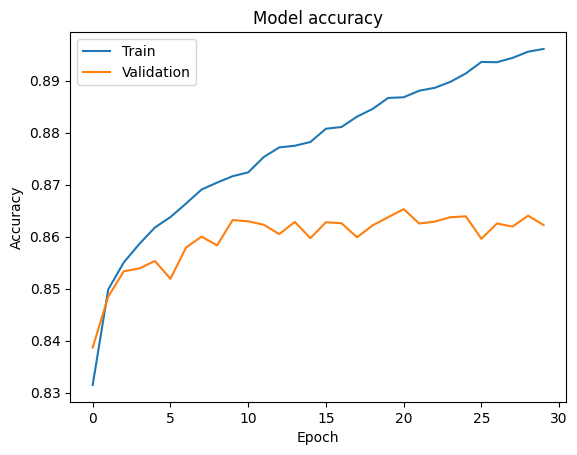

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
